In [1]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt
import numpy as np
from rpy2.robjects.packages import importr

mlbench = importr('mlbench')

In [2]:
spirals = mlbench.mlbench_spirals(1000, sd=0.07)
spiral_data, spiral_class = np.array(spirals[0])*2, np.array(spirals[1])

In [3]:
# Dividindo em dados de teste e dados de treino
x_train, x_test, y_train, y_test = tts(spiral_data, spiral_class, test_size=0.1)

<IPython.core.display.Javascript object>


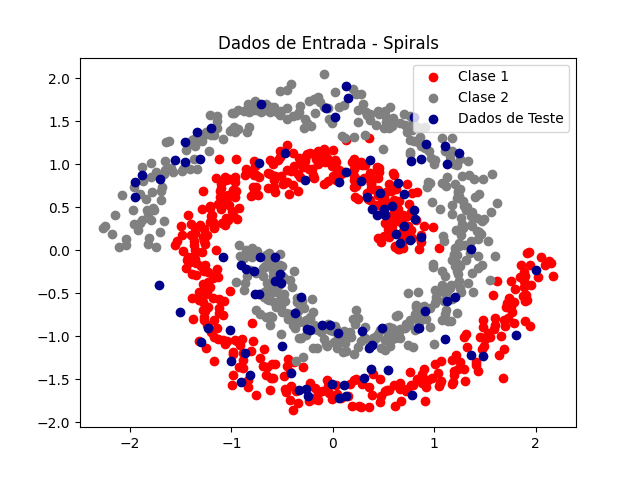

In [4]:
%matplotlib notebook
plt.title('Dados de Entrada - Spirals')
plt.scatter(x_train[y_train==1, 0], x_train[y_train==1, 1], color = 'Red', label = 'Clase 1')
plt.scatter(x_train[y_train==2, 0], x_train[y_train==2, 1], color = 'Grey', label = 'Clase 2')
plt.scatter(x_test[:, 0], x_test[:,1], color = 'DarkBlue', label = 'Dados de Teste')
plt.legend()
plt.show()

In [5]:
clf = SVC(C=100, kernel='rbf')
clf.fit(x_train, y_train)

SVC(C=100)

In [6]:
x1_lin = np.linspace(-2.5, 2.5, 100)
x2_lin = np.linspace(-2.5, 2.5, 100)
X1, X2 = np.meshgrid(x1_lin, x2_lin)
X_lin = np.column_stack((X1.ravel(),X2.ravel()))
sep = []
for X in X_lin:
    sep.append(clf.predict(X.reshape(1, -1)))

<IPython.core.display.Javascript object>


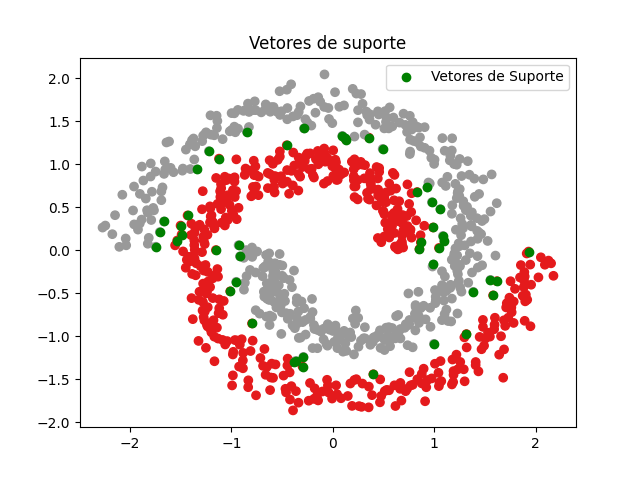

In [12]:
%matplotlib notebook

sp_vectors = clf.support_vectors_
plt.title('Hiperplano de Separação')
plt.scatter(X_lin[:, 0], X_lin[:, 1], c = sep, cmap = 'Set1')
plt.scatter(x_train[:, 0], x_train[:,1], c = y_train, cmap = 'Set1')
plt.scatter(sp_vectors[:, 0], sp_vectors[:, 1], color = 'Green', label = 'Vetores de Suporte')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


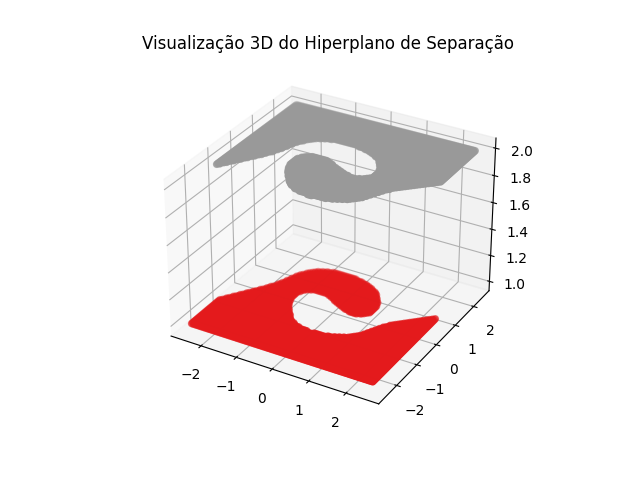

In [14]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

class_test = clf.predict(x_test)



fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
plt.title('Visualização 3D do Hiperplano de Separação')
ax.scatter(X_lin[:, 0], X_lin[:, 1], np.array(sep), c=sep, cmap="Set1")
plt.show()

In [18]:
from sklearn.metrics import classification_report as cr
print(cr(y_test, class_test))

              precision    recall  f1-score   support

           1       1.00      0.98      0.99        50
           2       0.98      1.00      0.99        50

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

